In [1]:
class SVM:

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None


    def fit(self, X, y):
        self.w=np.zeros(X.shape[1])
        self.b=0
        
        for _ in range(self.n_iters):
            for i in range(len(X)):
                if y[i]*(np.dot(self.w,X[i])-self.b)>=1:
                    dw=2*self.lambda_param*self.w
                    self.w=self.w-self.lr*dw
                else:
                    dw=2*self.lambda_param*self.w-np.dot(X[i],y[i])
                    db=y[i]
                    self.w=self.w-self.lr*dw
                    self.b=self.lr*y[i]
    def predict(self, X):
        y_pred=np.sign(np.dot(X, self.w)-self.b)
        return y_pred

In [53]:
clf=SVM()
clf.fit(X_train,y_train)
clf.predict(X_test)

array([-1.,  1.,  1., -1., -1., -1.,  1.,  1., -1., -1.])

In [ ]:
#manually

In [ ]:
from sklearn.svm import SVC
model=SVC(kernel='linear',C=0.01).fit(X_train, y_train)
model.predict(X_test)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

X, y =  datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

clf = SVM()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print(predictions)
print(clf.w, clf.b)

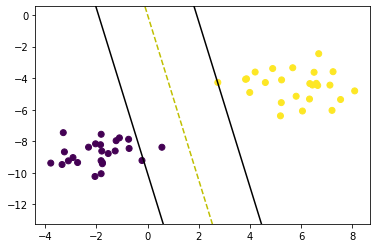

In [56]:
def visualize_svm():
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X[:,0], X[:,1], marker='o',c=y)

    x0_1 = np.amin(X[:,0])
    x0_2 = np.amax(X[:,0])

    x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

    ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
    ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
    ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

    x1_min = np.amin(X[:,1])
    x1_max = np.amax(X[:,1])
    ax.set_ylim([x1_min-3,x1_max+3])

    plt.show()

visualize_svm()